In [20]:
import numpy as np
import sys
sys.path.append('../')
from panav.environment.env import DefaultEmtpyEnv
from panav.hybrid import HybridGraph
from panav.environment.region import Box2DRegion

from panav.viz import draw_env,draw_hybrid

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Constructing environment
Plotting environment


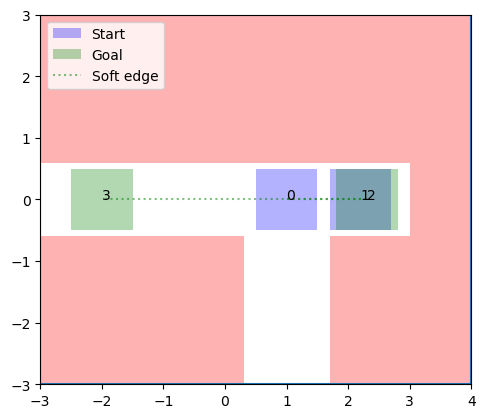

In [61]:
print('Constructing environment')
limits = [(-3,4),(-3,3)]
env = DefaultEmtpyEnv(limits=limits,N_agent = 2)
obs = []

obs.append(Box2DRegion([-3,3],(0.6,3)))
obs.append(Box2DRegion([-3,0.3],[-3,-0.6]))
obs.append(Box2DRegion([1.7,3],[-3,-0.6]))
obs.append(Box2DRegion([3,4],[-3,3]))

env.obstacles = obs

env.starts = np.array([[1,0],
                       [2.2,0]])


env.goals = np.array([[2.3,0],
                       [-2.0,0]])
env.calc_start_goal_regions()
print('Plotting environment')

HG = HybridGraph(env,agent_radius=0.5,tunnels=[])
draw_hybrid(HG,display_soft=True)

In [72]:
from panav.PIBT import PIBT_plan
bloating_r = 0.5
vmax = 1.0
TIMEOUT = 30
plans = PIBT_plan(HG,vmax,bloating_r,TIMEOUT,max_iter=100,tau=3.0,exec_tau=3.0)

################# Time step 0 ################
Remaining agents 2
################# Time step 1 ################
Remaining agents 2
################# Time step 2 ################
Remaining agents 2
################# Time step 3 ################
Remaining agents 2
################# Time step 4 ################
Remaining agents 2
################# Time step 5 ################
Remaining agents 2
################# Time step 6 ################
Remaining agents 2
################# Time step 7 ################
Remaining agents 2
################# Time step 8 ################
Remaining agents 2
################# Time step 9 ################
Remaining agents 2
################# Time step 10 ################
Remaining agents 2
################# Time step 11 ################
Remaining agents 2


/Users/tianpengzhang/opt/miniconda3/envs/PA-NAV/lib/python3.11/site-packages/cvxpy/problems/problem.py:1391: UserWarning: 
    The problem is either infeasible or unbounded, but the solver
    cannot tell which. Disable any solver-specific presolve methods
    and re-solve to determine the precise problem status.

    For GUROBI and CPLEX you can automatically perform this re-solve
    with the keyword argument prob.solve(reoptimize=True, ...).
    
  warnings.warn(INF_OR_UNB_MESSAGE)


################# Time step 12 ################
Remaining agents 2
################# Time step 13 ################
Remaining agents 2
################# Time step 14 ################
Remaining agents 2
################# Time step 15 ################
Remaining agents 2
################# Time step 16 ################
Remaining agents 2
################# Time step 17 ################
Remaining agents 2
################# Time step 18 ################
Remaining agents 2
################# Time step 19 ################
Remaining agents 2
################# Time step 20 ################
Remaining agents 2
################# Time step 21 ################
Remaining agents 2
################# Time step 22 ################
Remaining agents 2
################# Time step 23 ################
Remaining agents 2
################# Time step 24 ################
Remaining agents 2
################# Time step 25 ################
Remaining agents 2
################# Time step 26 ################
Remaining agen

In [73]:
from matplotlib import pyplot as plt
from panav.viz import animation
from IPython.display import HTML, display
from matplotlib import rcParams

exec_tau = 1.0

rcParams['animation.embed_limit'] = 2**128
dt = exec_tau * 0.25
agents = range(len(plans))
pos_to_ani = [np.array(plans[a][1]) for a in agents]
anim = animation(env, pos_to_ani, bloating_r, dt = dt)
display(HTML(anim.to_jshtml()))
plt.close() 